# Welcome to Forge!

This notebook gives very simple examples of solving problems with simulators and quantum hardware with Forge.

## Table of Contents
1. [Binary Optimization](#optimization)
2. [Machine Learning](#qml)  
3. [Additional Examples](#examples) 

### Binary Optimization

We start with the problem of minimizing the function

$$
f(x_0, x_1, x_2) = x_0^2 + x_1^2 - x_2^2 + x_0 x_1 + x_1 x_2
$$

where $x_0, x_1$, and $x_2$ can be either 0 or 1.


#### Specify the problem instance

In [1]:
from qcware.forge import optimization
from qcware.types.optimization import PolynomialObjective, Constraints, BinaryProblem

qubo = {
    (0, 0): 1, 
    (0, 1): 1, 
    (1, 1): 1, 
    (1, 2): 1, 
    (2, 2): -1
}

qubo_objective = PolynomialObjective(
    polynomial=qubo, 
    num_variables=3,
    domain='boolean'
)

problem_instance = BinaryProblem(
    objective=qubo_objective, 
    constraints=None,
)

#### Quantum annealing with D-Wave

In [2]:
# Uncomment the following to run on D-Wave (available to enterprise users).

# results = optimization.optimize_binary(
#     instance=problem_instance, 
#     backend='dwave/advantage',
# )
# print(results)

#### Brute force solution

In [3]:
# CPU-powered brute force solution

results = optimization.brute_force_minimize(
    objective=qubo_objective,
    backend='qcware/cpu'
)
print(results)

Objective value: -1
Solution: [0, 0, 1]


In [4]:
# Uncomment to run on GPU (available to enterprise users).
# GPU-powered brute force solution (handles more variables faster).

# results = optimization.brute_force_minimize(
#     objective=qubo_objective, 
#     backend='qcware/gpu'
# )
# print(results)

### Machine Learning

Forge provides access to turnkey quantum machine learning (QML) algorithms. Our example here will be clustering two-dimensional data points with q-means.

#### Generate data

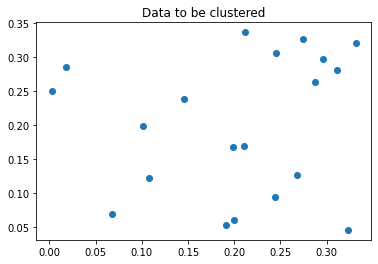

In [5]:
import numpy as np
from qcware.forge.qml import fit_and_predict
from matplotlib import pyplot as plt

data = np.random.rand(20, 2)
data = data / np.linalg.norm(data, axis=0) # Normalize data


plt.scatter(data[:, 0], data[:, 1])
plt.title('Data to be clustered')
plt.show()

#### Cluster with q-means

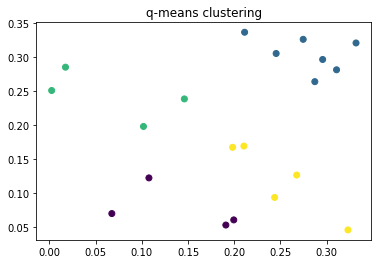

In [6]:
n_clusters = 4
qlabels = fit_and_predict(
    data,
    model='QMeans', 
    parameters={'n_clusters': n_clusters}, 
    backend='qcware/cpu_simulator'
)

plt.scatter(data[:, 0], data[:, 1], c=qlabels)
plt.title('q-means clustering')
plt.show()

### Additional Examples

You can find examples covering 

* Optimization
* Machine Learning
* Linear Algebra
* Quantum Circuits

in `/GettingStarted/Examples/`.